In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_json('../data/train.json')

In [3]:
song = pd.read_json('../data/song_meta.json')

In [3]:
train.head()

,tags,id,plylst_title,songs,like_cnt,updt_date
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19.000
1,"[추억, 회상]",10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42.000
2,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",147456,크리스마스 분위기에 흠뻑 취하고 싶을때,"[394031, 195524, 540149, 287984, 440773, 10033...",33,2019-12-05 15:15:18.000
4,[댄스],27616,추억의 노래 ㅋ,"[159327, 553610, 5130, 645103, 294435, 100657,...",9,2011-10-25 13:54:56.000


In [5]:
song.head()

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
0,[GN0901],20140512,불후의 명곡 - 7080 추억의 얄개시대 팝송베스트,2255639,[2727],Feelings,[GN0900],[Various Artists],0
1,"[GN1601, GN1606]",20080421,"Bach : Partitas Nos. 2, 3 & 4",376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[GN1600],[Murray Perahia],1
2,[GN0901],20180518,Hit,4698747,[3361],Solsbury Hill (Remastered 2002),[GN0900],[Peter Gabriel],2
3,"[GN1102, GN1101]",20151016,Feeling Right (Everything Is Nice) (Feat. Popc...,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[GN1100],[Matoma],3
4,"[GN1802, GN1801]",20110824,그남자 그여자,2008470,[560160],그남자 그여자,[GN1800],[Jude Law],4


In [4]:
train.shape

(115071, 6)

# 태그 간 동시출현 빈도 기준 임베딩

* 참고: https://www.kaggle.com/alexklibisz/simple-word-vectors-with-co-occurrence-pmi-and-svd
* simple word vectors with co-occurence PMI and SVD

In [4]:
from collections import Counter
from itertools import combinations
from math import log
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import svds
from string import punctuation
from pprint import pformat

In [42]:
train_tags = train.tags.tolist()

In [76]:
# Compute unigram and bigram counts.
# A unigram is a single word (x). A bigram is a pair of words (x,y).
# Bigrams are counted for any two terms occurring in the same title.
# For example, the title "Foo bar baz" has unigrams [foo, bar, baz]
# and bigrams [(bar, foo), (bar, baz), (baz, foo)]
cx = Counter()
cxy = Counter()

for tags in train_tags:
    for x in tags:
        cx[x] += 1
        
    for x, y in set(map(tuple, map(sorted, combinations(tags, 2)))):
        cxy[(x,y)] += 1

In [77]:
cx.most_common()

[('기분전환', 16465),
 ('감성', 11417),
 ('휴식', 11215),
 ('발라드', 10796),
 ('잔잔한', 10218),
 ('드라이브', 10095),
 ('힐링', 9783),
 ('사랑', 8704),
 ('새벽', 8320),
 ('밤', 7615),
 ('카페', 6837),
 ('추억', 6520),
 ('팝', 6425),
 ('힙합', 6413),
 ('이별', 5400),
 ('설렘', 4910),
 ('신나는', 4861),
 ('회상', 4579),
 ('매장음악', 4576),
 ('여행', 4559),
 ('인디', 4531),
 ('가을', 4042),
 ('락', 4007),
 ('겨울', 3965),
 ('스트레스', 3925),
 ('슬픔', 3527),
 ('뉴에이지', 3493),
 ('랩', 3421),
 ('봄', 3387),
 ('여름', 3297),
 ('댄스', 3293),
 ('Pop', 3248),
 ('재즈', 3213),
 ('알앤비', 3186),
 ('비오는날', 2982),
 ('까페', 2856),
 ('산책', 2731),
 ('운동', 2646),
 ('분위기', 2467),
 ('OST', 2323),
 ('일렉', 2234),
 ('클래식', 2155),
 ('피아노', 1920),
 ('위로', 1910),
 ('소울', 1871),
 ('클럽', 1644),
 ('팝송', 1623),
 ('연주곡', 1539),
 ('EDM', 1528),
 ('주말', 1490),
 ('트렌디', 1483),
 ('명곡', 1445),
 ('커피', 1356),
 ('취향저격', 1352),
 ('오후', 1338),
 ('아이돌', 1322),
 ('매장', 1311),
 ('저녁', 1286),
 ('어쿠스틱', 1241),
 ('그루브', 1237),
 ('아침', 1183),
 ('우울', 1133),
 ('편안한', 1094),
 ('RnB', 996),
 ('퇴근길',

In [78]:
# build unigram <-> index lookup
x2i, i2x = {}, {}
for i, x in enumerate(cx.keys()):
    x2i[x] = i
    i2x[i] = x

In [79]:
# sum unigram and bigram counts for computing probabilities.
sx  = sum(cx.values())
sxy = sum(cxy.values())

In [82]:
# Accumulate data, rows, and cols to build sparse PMI matrix
# Recall from the blog post that the PMI value for a bigram with tokens (x, y) is: 
# PMI(x,y) = log(p(x,y) / p(x) / p(y)) = log(p(x,y) / (p(x) * p(y)))
# The probabilities are computed on the fly using the sums from above.
pmi_samples = Counter()
data, rows, cols = [], [], []

for (x, y), n in cxy.items():
    rows.append(x2i[x])
    cols.append(x2i[y])
    data.append(log((n / sxy) / (cx[x] / sx) / (cx[y] / sx)))
    pmi_samples[(x, y)] = data[-1]
    
PMI = csc_matrix((data, (rows, cols)))

print('%d non-zero elements' % PMI.count_nonzero())
print('Sample PMI values\n', pformat(pmi_samples.most_common()[:10]))

370231 non-zero elements
Sample PMI values
 [(('거슈윈', '미국클래식'), 12.076987041913736),
 (('랩소디인블루', '아메리칸클래식'), 12.076987041913736),
 (('거슈윈', '랩소디인블루'), 12.076987041913736),
 (('미국클래식', '아메리칸클래식'), 12.076987041913736),
 (('랩소디인블루', '미국클래식'), 12.076987041913736),
 (('거슈윈', '아메리칸클래식'), 12.076987041913736),
 (('나만들을거얌', '나만들을꺼'), 12.076987041913736),
 (('린아', '선데이'), 12.076987041913736),
 (('스테파니', '천상지희'), 12.076987041913736),
 (('다나', '스테파니'), 12.076987041913736)]


In [94]:
print(PMI.shape)

(29159, 29159)


In [83]:
# Factorize the PMI matrix using sparse SVD aka "learn the unigram/word vectors".
# This part replaces the stochastic gradient descent used by Word2vec
# and other related neural network formulations. We pick an arbitrary vector size k=20.
U, _, _ = svds(PMI, k=20)

In [84]:
# Normalize the vectors to enable computing cosine similarity in next cell.
# If confused see: https://en.wikipedia.org/wiki/Cosine_similarity#Definition
norms = np.sqrt(np.sum(np.square(U), axis=1, keepdims=True))
U /= np.maximum(norms, 1e-7)

In [96]:
# Show some nearest neighbor samples as a sanity-check.
# The format is <unigram> <count>: (<neighbor unigram>, <similarity>), ...
# From this we can see that the relationships make sense.
k = 5
for x in ['까페', '잔잔한', '댄스', '추억', '크리스마스', '요가', '사랑', '불금']:
    dd = np.dot(U, U[x2i[x]]) # Cosine similarity for this unigram against all others.
    s = ''
    # Compile the list of nearest neighbor descriptions.
    # Argpartition is faster than argsort and meets our needs.
    for i in np.argpartition(-1 * dd, k + 1)[:k + 1]:
        if i2x[i] == x: continue
        xy = tuple(sorted((x, i2x[i])))
        s += '(%s, %.3lf) ' % (i2x[i], dd[i])
    print('%s, %d\n %s' % (x, cx[x], s))
    print('-' * 10)

까페, 2856
 (2019힙합플레이야페스티벌, 0.665) (오늘비, 0.655) (온갖장르, 0.652) (귀환, 0.650) (김재덕, 0.650) 
----------
잔잔한, 10218
 (취침시간, 0.934) (잔잔한노래, 0.824) (아무생각없음, 0.817) (조용한, 0.816) (쌀쌀한저녁, 0.815) 
----------
댄스, 3293
 (잘놀아, 0.905) (choreography, 0.877) (나갈준비, 0.886) (시원한여름, 0.871) (신나는아이돌댄스, 0.871) 
----------
추억, 6520
 (옛날노래, 0.843) (90년대생들의, 0.839) (추억팔이, 0.843) (오래된팝송, 0.838) (한글가사, 0.829) 
----------
크리스마스, 948
 (캐롤, 0.993) (팝캐롤, 0.979) (합창캐롤, 0.977) (화이트크리스마스, 0.976) (왕국, 0.976) 
----------
요가, 120
 (정신수양, 0.941) (엠씨스퀘어, 0.967) (스트레칭, 0.950) (오레인탈, 0.938) (요가원, 0.936) 
----------
사랑, 8704
 (짝사랑하던, 0.868) (설렘, 0.924) (사랑노래, 0.864) (예쁜걸, 0.901) (이거마시면_나랑_사귀는거다, 0.862) 
----------
불금, 488
 (클럽, 0.813) (신나, 0.885) (파티뮤직, 0.815) (클럽음악, 0.816) (하우스, 0.807) 
----------


In [92]:
dd.shape

(29159,)

# 플레이리스트 속 노래 간 동시출현 기반 임베딩

In [5]:
playlist_songs = train.songs.tolist()

In [6]:
cx_ = Counter()
cxy_ = Counter()

for songs in playlist_songs:
    for x in songs:
        cx_[x] += 1
        
    for x, y in set(map(tuple, map(sorted, combinations(songs, 2)))):
        cxy_[(x,y)] += 1

In [7]:
for song_id, cnt in cx_.most_common()[:10]:
    print(song[song.id == song_id]['song_name'], cnt)

144663    밤편지
Name: song_name, dtype: object 2175
116573    안아줘
Name: song_name, dtype: object 2121
357367    비
Name: song_name, dtype: object 1981
366786    가끔 미치도록 네가 안고 싶어질 때가 있어
Name: song_name, dtype: object 1919
654757    눈의 꽃
Name: song_name, dtype: object 1647
133143    그대와 나, 설레임 (Feat. 소울맨)
Name: song_name, dtype: object 1633
349492    어떤이별
Name: song_name, dtype: object 1599
675115    야생화
Name: song_name, dtype: object 1598
463173    비가 내렸어 (Vocal by 스티브언니)
Name: song_name, dtype: object 1544
42155    벙어리
Name: song_name, dtype: object 1540


In [8]:
# song_name, song_id 간의 dictionary
keys = song['id'].tolist()
values = song['song_name'].tolist()
song_dic = dict(zip(keys, values))

In [12]:
# build unigram <-> index lookup
# x2i, i2x = {}, {}
# for i in cx_.keys(): # i = song_id
#     x = song_dic[i] # x = song_name
#     x2i[x] = i # key: song_name, value: song_id
#     i2x[i] = x # key: song_id, value: song_name

In [9]:
# sum unigram and bigram counts for computing probabilities.
sx_  = sum(cx_.values())
sxy_ = sum(cxy_.values())

In [10]:
# Accumulate data, rows, and cols to build sparse PMI matrix
# Recall from the blog post that the PMI value for a bigram with tokens (x, y) is: 
# PMI(x,y) = log(p(x,y) / p(x) / p(y)) = log(p(x,y) / (p(x) * p(y)))
# The probabilities are computed on the fly using the sums from above.
pmi_samples_ = Counter()
data_, rows_, cols_ = [], [], []

In [11]:
for (x, y), n in cxy_.items():
    rows_.append(x)
    cols_.append(y)
    data_.append(log((n / sxy_) / (cx_[x] / sx_) / (cx_[y] / sx_)))
    pmi_samples_[(x, y)] = data_[-1]

In [ ]:
# 여기서부터 노트북 메모리 에러나는 듯
# python으로 돌리면 제일 밑에처럼 결과가 나옴
PMI_ = csc_matrix((data_, (rows_, cols_)))

print('%d non-zero elements' % PMI_.count_nonzero())
print('Sample PMI values\n', pformat(pmi_samples_.most_common()[:10]))

In [ ]:
print(PMI_.shape)

In [ ]:
U_, _, _ = svds(PMI_, k=20)

In [ ]:
norms_ = np.sqrt(np.sum(np.square(U_), axis=1, keepdims=True))
U_ /= np.maximum(norms_, 1e-7)

In [ ]:
k = 5
for x in [394031, 159327, 525514, 166267, 497066]:
    dd_ = np.dot(U_, U_[x]) # Cosine similarity for this unigram against all others.
    s_ = ''
    # Compile the list of nearest neighbor descriptions.
    # Argpartition is faster than argsort and meets our needs.
    for i in np.argpartition(-1 * dd_, k + 1)[:k + 1]:
        if i == x: continue
        xy = tuple(sorted((x, i)))
        s_ += '(%s, %.3lf) ' % (song_dic[i], dd_[i])
    print('%s, %d\n %s' % (song_dic[x], cx_[x], s_))
    print('-' * 10)

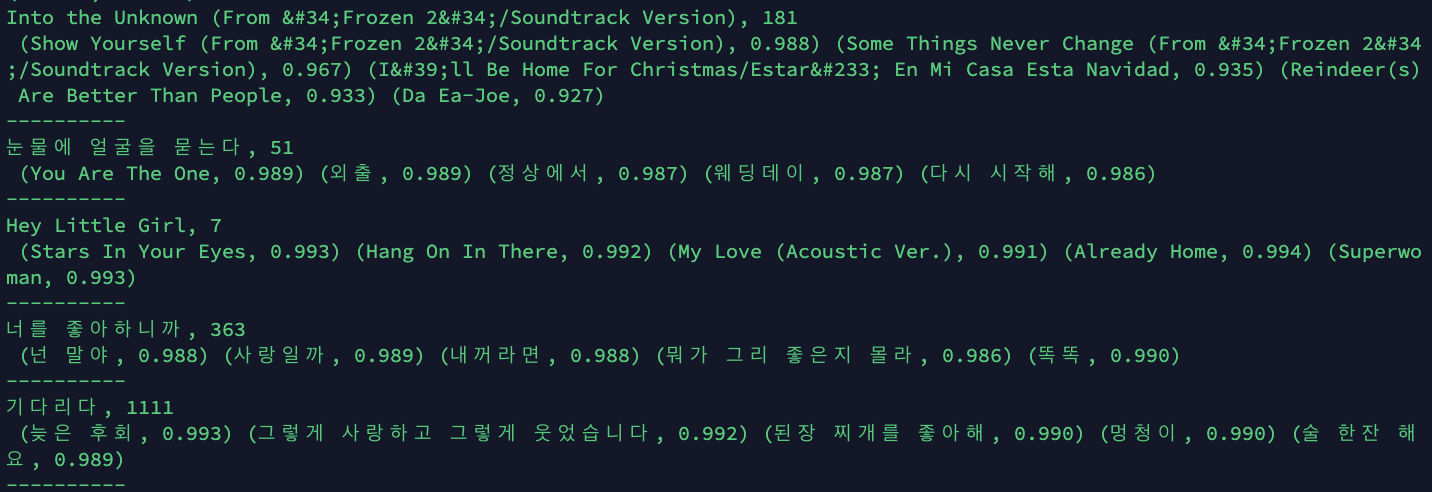

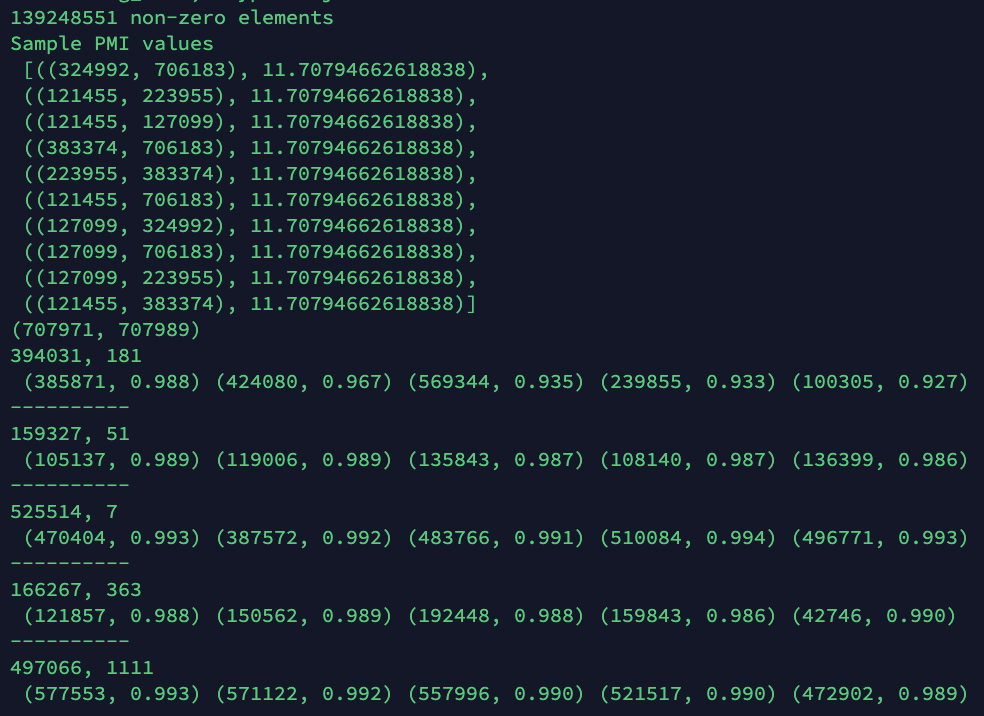

# validation data 적용

* 불가능
* playlist에 song이 아무것도 주어지지 않는 경우, seed가 될 노래가 없음
* 태그도 마찬가지

In [2]:
val = pd.read_json('../data/val.json')

In [7]:
val.shape

(23015, 6)

In [6]:
val.head()

,tags,id,plylst_title,songs,like_cnt,updt_date
0,[],118598,,"[373313, 151080, 275346, 696876, 165237, 52593...",1675,2019-05-27 14:14:33.000
1,[],131447,앨리스테이블,[],1,2014-07-16 15:24:24.000
2,[],51464,,"[529437, 516103, 360067, 705713, 226062, 37089...",62,2008-06-21 23:26:22.000
3,[],45144,,"[589668, 21711, 570151, 320043, 13930, 599327,...",20,2017-10-30 18:15:43.000
4,[],79929,,"[672718, 121924, 102694, 683657, 201558, 38511...",20,2017-02-07 11:40:42.000


In [21]:
val['num_songs'] = list(map(lambda x: len(x), val['songs']))

In [26]:
val.head()

,tags,id,plylst_title,songs,like_cnt,updt_date,num_songs
0,[],118598,,"[373313, 151080, 275346, 696876, 165237, 52593...",1675,2019-05-27 14:14:33.000,27
1,[],131447,앨리스테이블,[],1,2014-07-16 15:24:24.000,0
2,[],51464,,"[529437, 516103, 360067, 705713, 226062, 37089...",62,2008-06-21 23:26:22.000,14
3,[],45144,,"[589668, 21711, 570151, 320043, 13930, 599327,...",20,2017-10-30 18:15:43.000,17
4,[],79929,,"[672718, 121924, 102694, 683657, 201558, 38511...",20,2017-02-07 11:40:42.000,8


In [30]:
genre = pd.read_json('../data/genre_gn_all.json', typ='series')

In [31]:
genre.shape

(254,)

In [32]:
genre.head()

GN0100       발라드
GN0101    세부장르전체
GN0102       '80
GN0103       '90
GN0104       '00
dtype: object